# Let's explore EXFOR offerings for Ca48

In [1]:
import pickle
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
proton = (1, 1)
neutron = (1, 0)

In [4]:
target =(208, 82)

In [35]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

There was an error reading entry C1292, it will be skipped:
Missing 'Angle' field!
There was an error reading entry O0187, it will be skipped:
Missing 'Angle' field!
There was an error reading entry O0191, it will be skipped:
Missing 'Angle' field!


In [36]:
# these are considered outliers or not useful
entries_to_ignore = ['C2700', 'O0598', 'C1019']
for entry in entries_to_ignore:
    del all_entries_pp[entry]

In [37]:
all_entries_pp

{'C0893': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d844e610>,
 'E1201': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dc6b5850>,
 'E1846': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d7bf4bd0>,
 'O0032': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d8e08a10>,
 'O0049': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d9c48590>,
 'O0142': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768da6ff2d0>,
 'O0157': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d6bf1390>,
 'O0166': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d85d5890>,
 'O0187': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d85d5890>,
 'O0191': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d85d5890>,
 'O0208': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dc6325d0>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dacfdcd0>,
 'O0225': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dacffd10>,

C0893 1
E1201 1
E1846 1
O0032 1
O0049 1
O0142 1
O0157 1
O0166 1
O0187 1
O0191 1
O0208 1
O0211 1
O0225 1
O0285 1
O0287 7
O0391 1
T0101 4


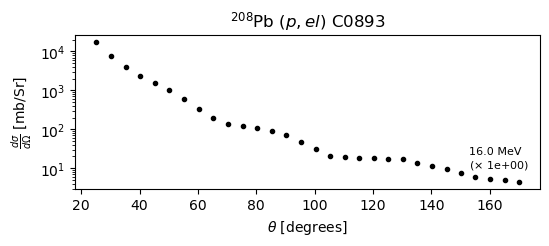

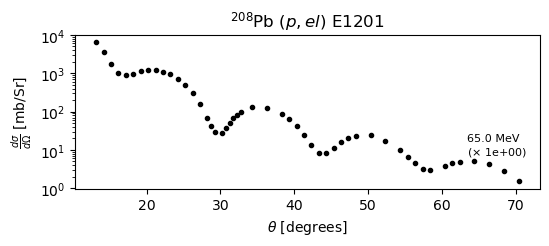

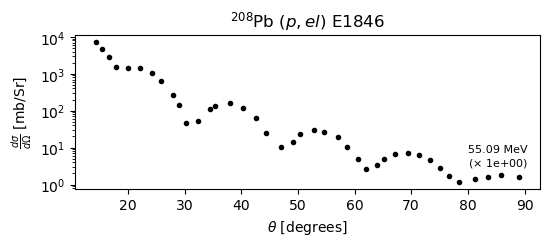

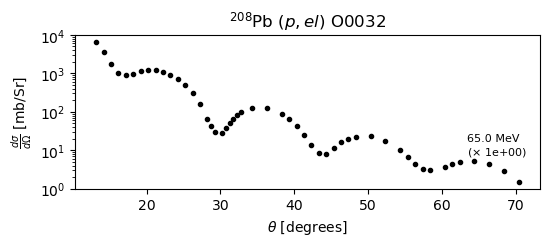

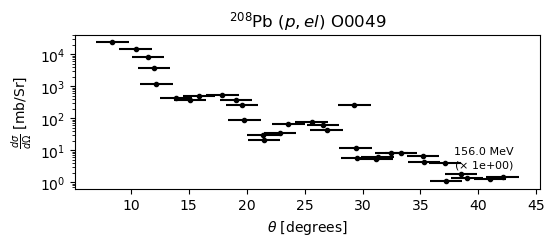

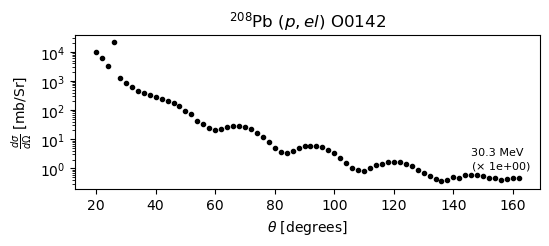

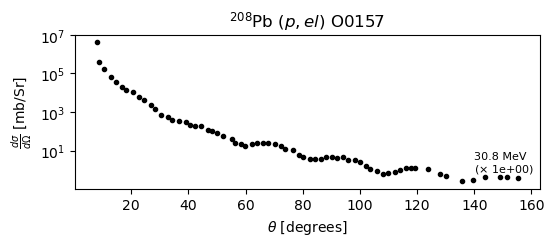

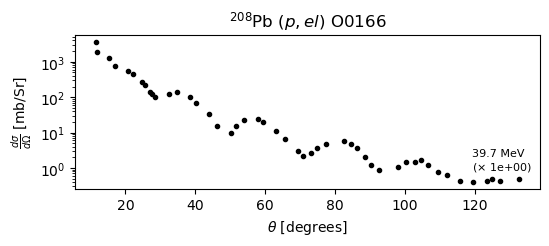

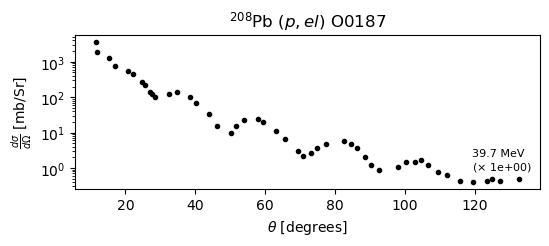

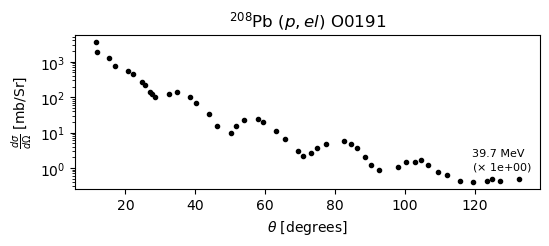

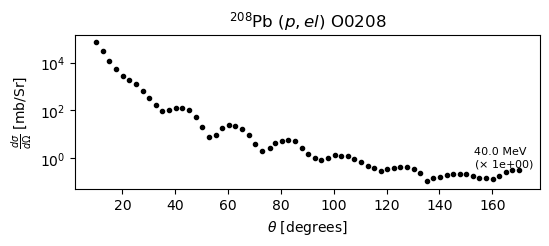

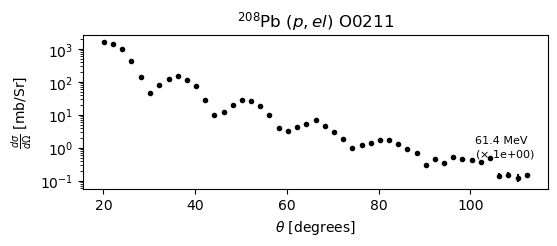

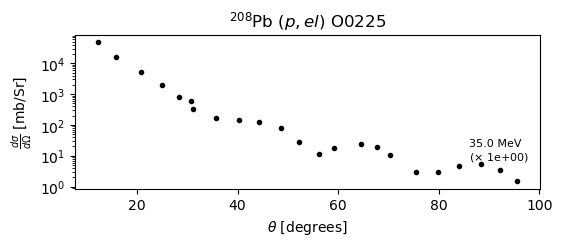

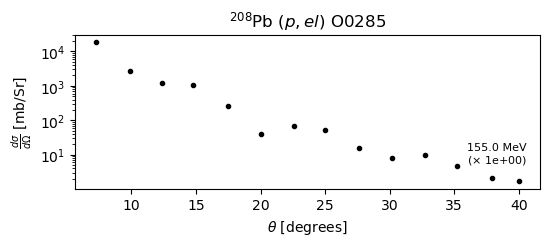

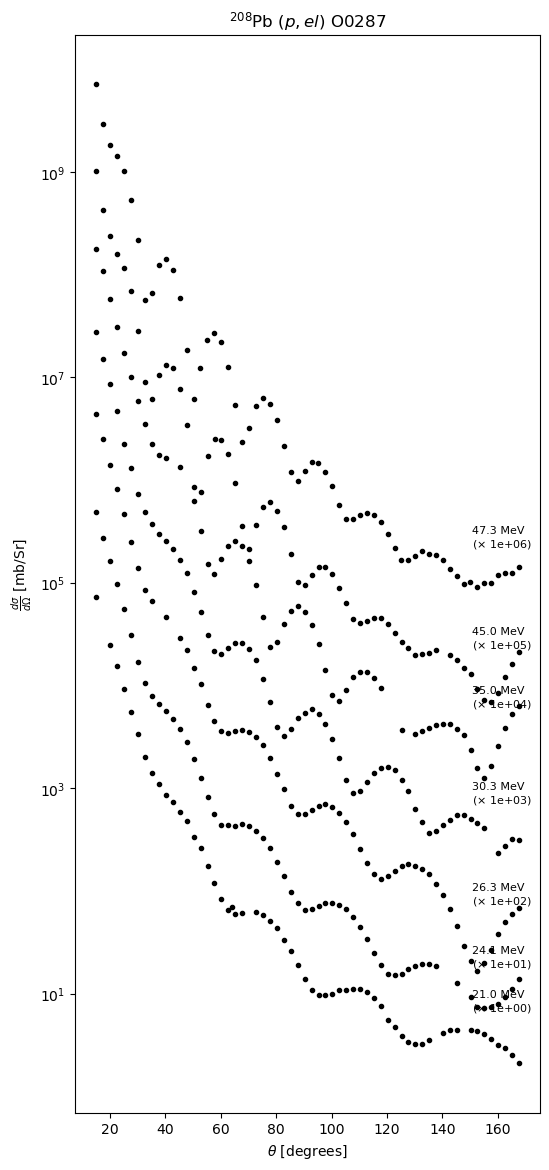

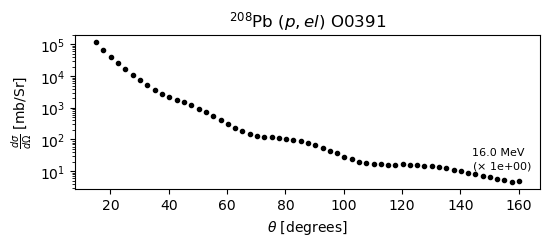

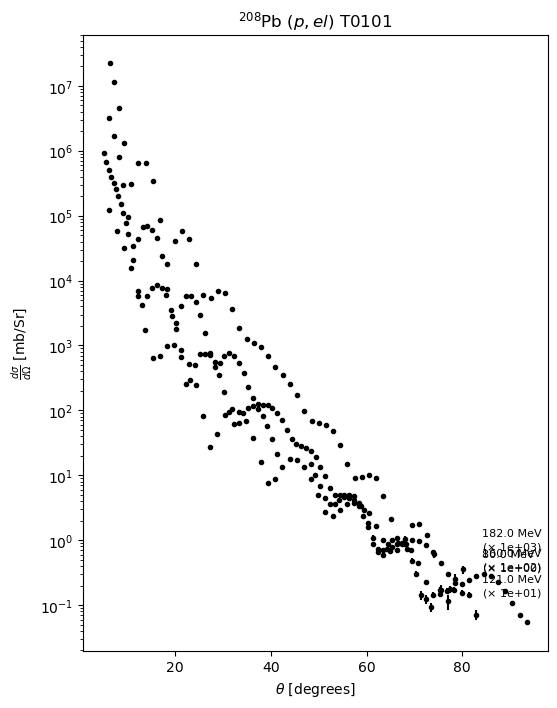

In [38]:
for entry, data in all_entries_pp.items():

    N = len(data.measurements)
    print(entry, N)
    if N < 10:
        fig, ax = plt.subplots(1, 1, figsize=(6, 2 * N))
        data.plot_experiment(
            ax,
            xlim=None,
            offsets=10,
            label_energy_err=False,
            label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
        )
        ax.set_title(f"{data.fancy_label} {entry}")
    else:
        N_plots = N // 10
        remaining = N % 10
        if remaining > 0:
            N_plots +=1
        for i in range(N_plots):
            fig, ax = plt.subplots(1, 1, figsize=(6, 20))
            data.plot_experiment(
                ax,
                data.measurements[i * N_plots: (i+1)*N_plots],
                xlim=None,
                offsets=10,
                label_energy_err=False,
                label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
            )
            ax.set_title(f"{data.fancy_label} {entry}")


In [9]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [10]:
all_entries_pp_ruth

{'C1019': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768d7893e90>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dc5c89d0>,
 'O0287': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dc202590>,
 'O0300': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dba37810>,
 'O0302': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768db9b6310>,
 'O0328': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd57c210>,
 'O0490': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dc4ade90>,
 'O0552': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd302110>,
 'O0788': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd9c87d0>}

In [11]:
# these are considered outliers or not useful
entries_to_ignore = []
for entry in entries_to_ignore:
    del all_entries_pp_ruth[entry]

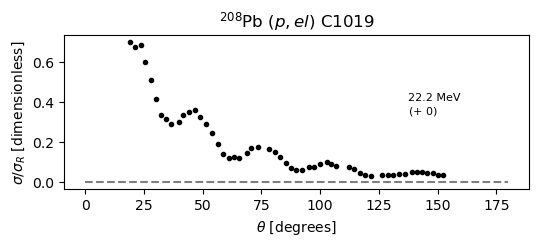

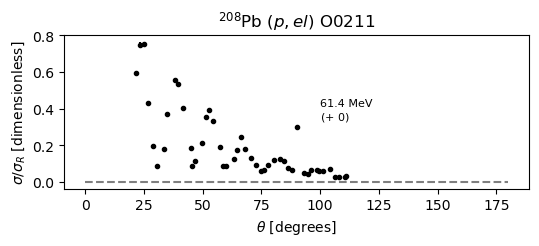

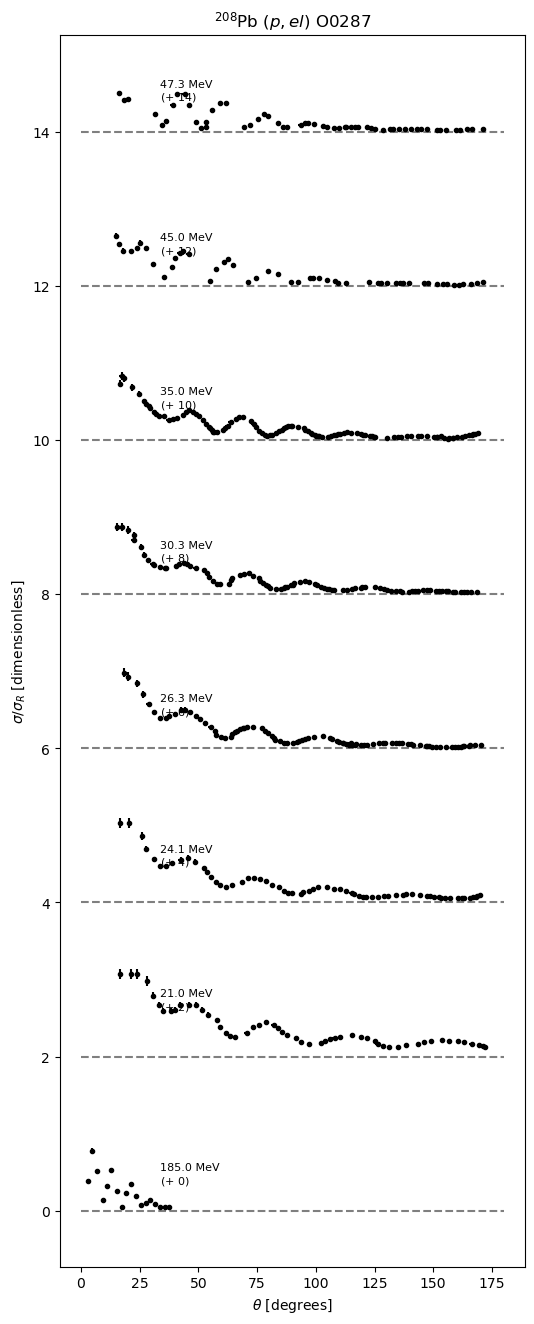

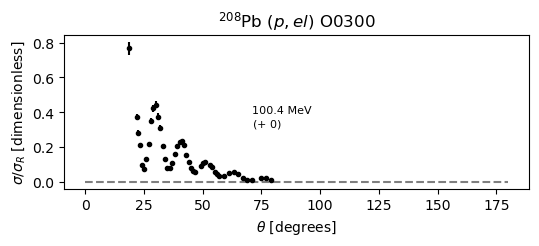

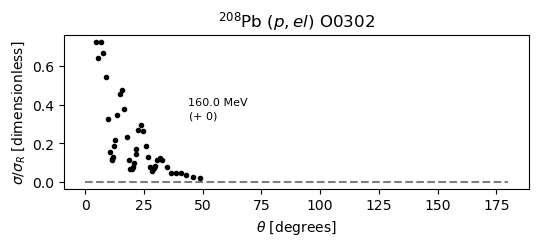

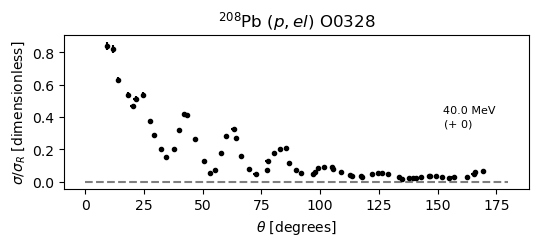

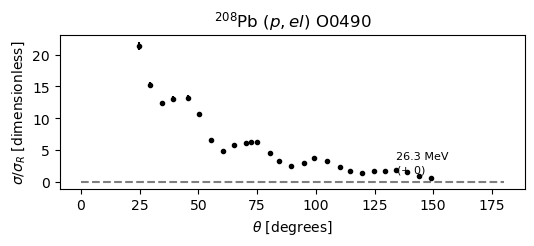

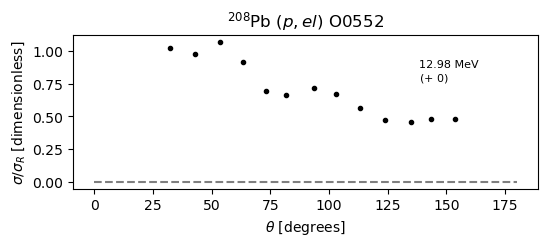

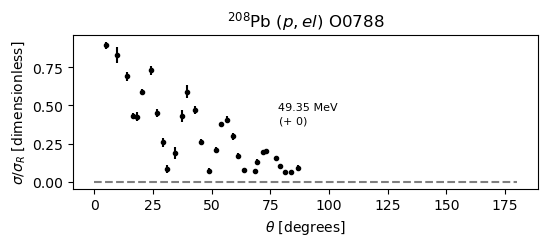

In [18]:
for entry, data in all_entries_pp_ruth.items():

    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2 * N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=2,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
        label_offset_factor=0.3,
        log=False,
        add_baseline=True,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [13]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [14]:
all_entries_nn

{'10871': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dc39ea10>,
 '12701': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768db7467d0>,
 '12865': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd7e36d0>,
 '12935': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd6d37d0>,
 '13685': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dcfcc350>,
 '13946': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd132f50>,
 '14317': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd04fb50>,
 '22847': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd747e10>,
 '22987': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd918e10>,
 '23059': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dd91bc50>,
 '40288': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7768dcc8be10>}

In [19]:
# these are considered outliers or not useful
entries_to_ignore = ['40288']
for entry in entries_to_ignore:
    del all_entries_nn[entry]

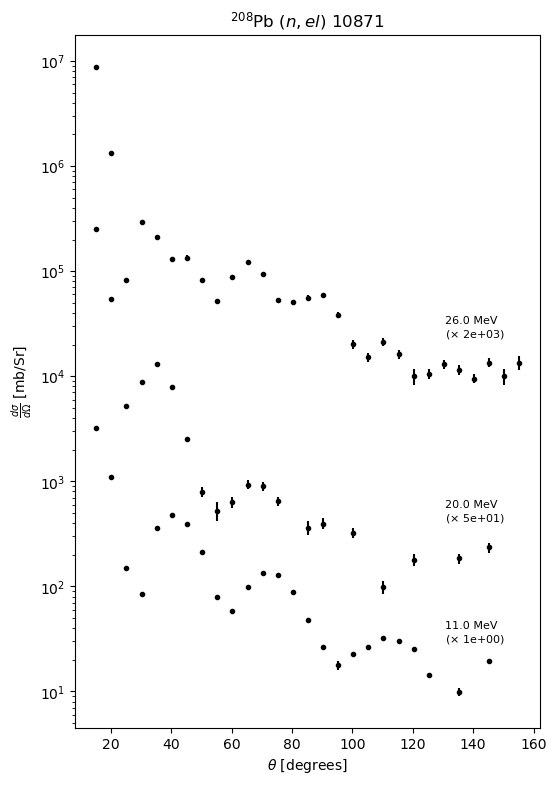

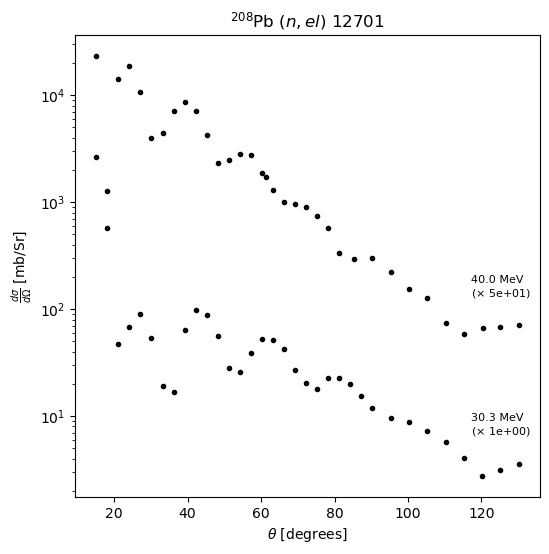

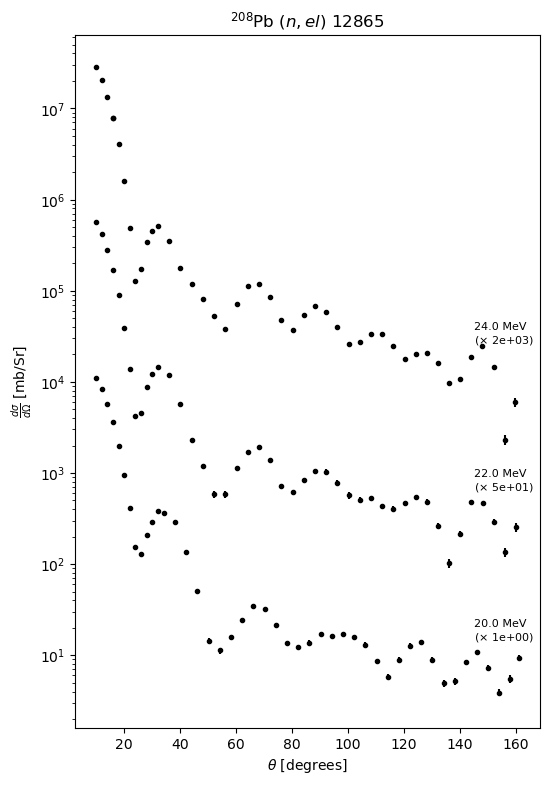

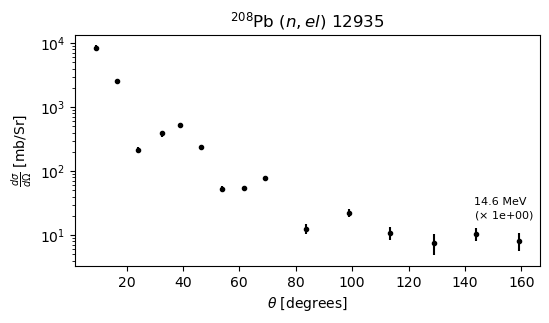

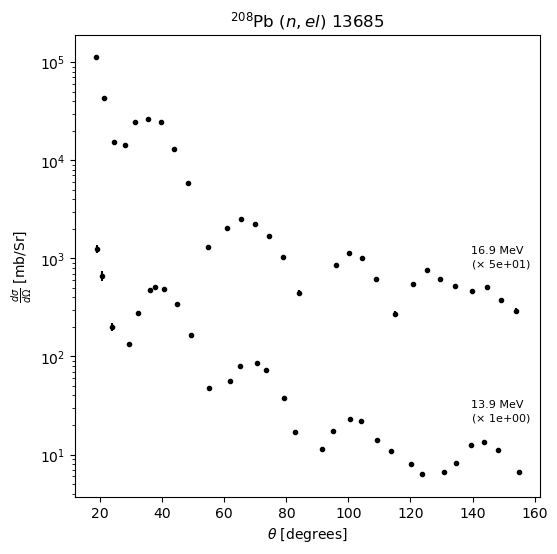

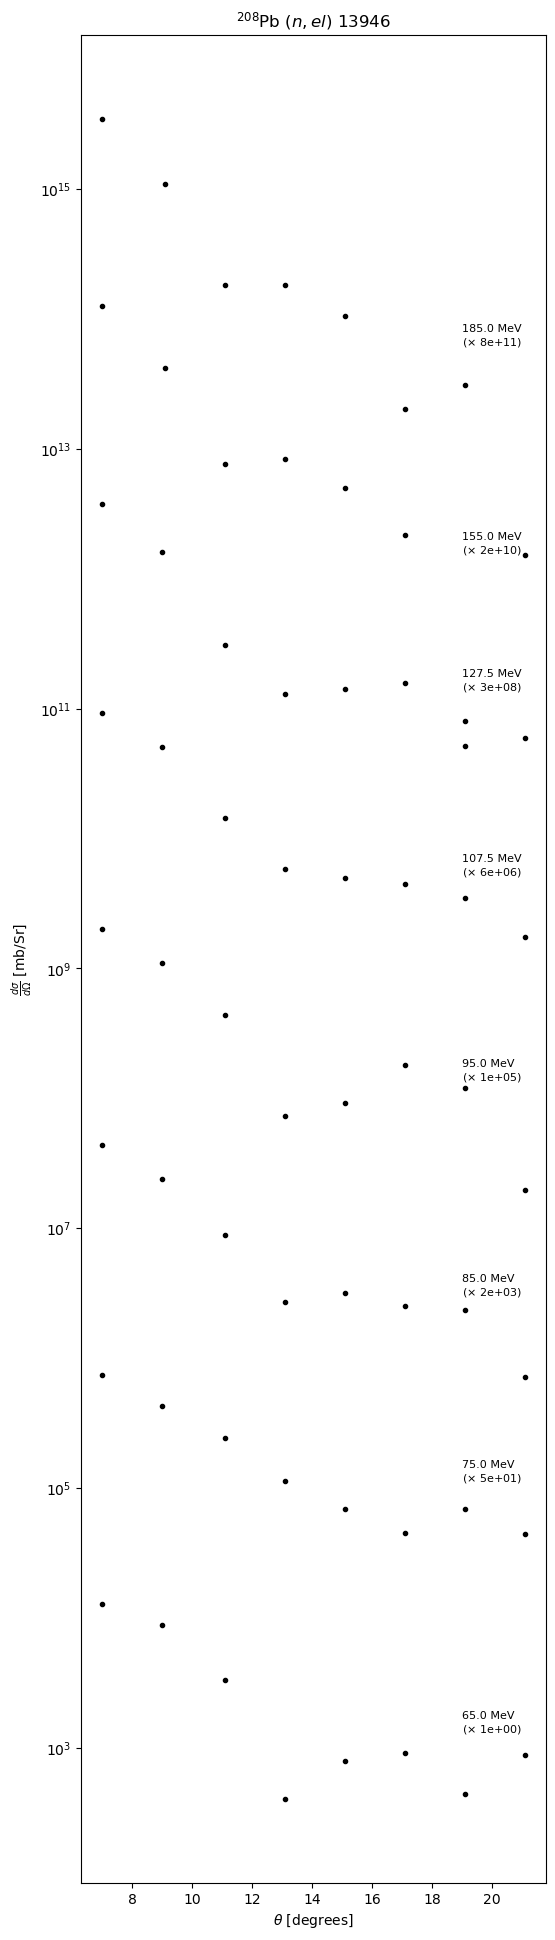

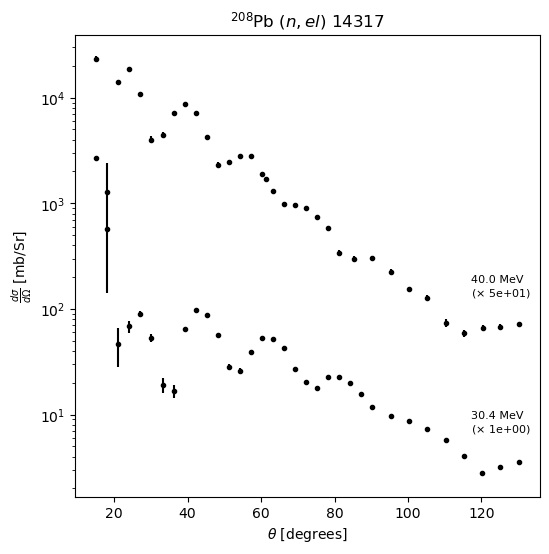

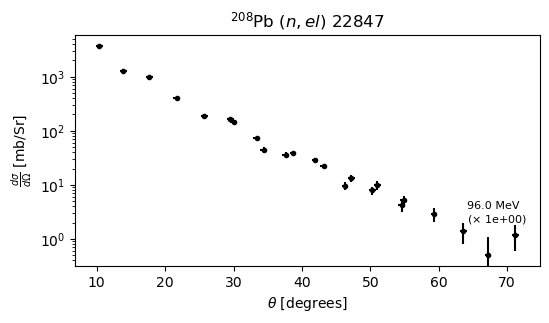

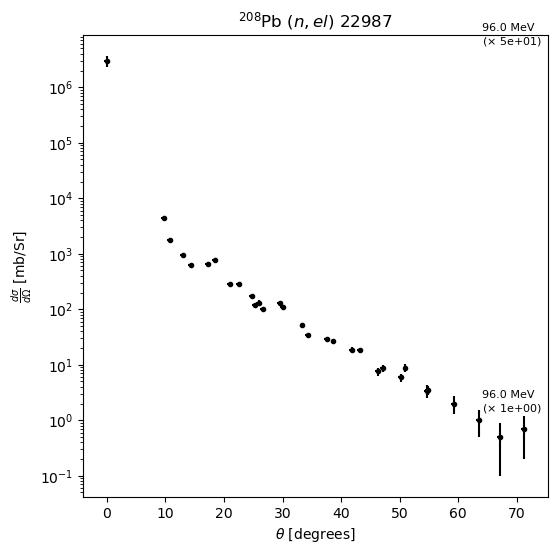

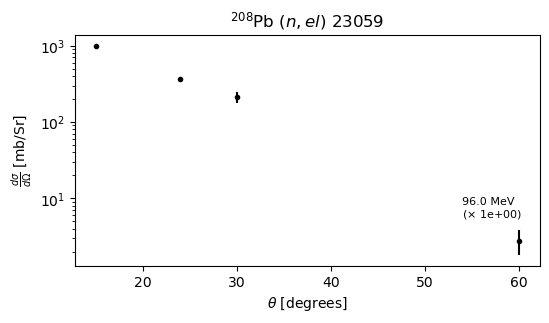

In [20]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 3*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=50,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")